In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Producing boxplots

For each class, the CSV files are read, then a class column is added to distinguish between selection and neutral class.
A new CSV file is then produced containing the new class column.

In [2]:
#Import selection csv data
data = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_croms_merged_sel.csv')

#create df
df = pd.DataFrame(data)
df

#add class column for selection
df["class"] = "selection"
df

# Write it to a new CSV file
df.to_csv("/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_merged_selection.csv", index=False)

In [3]:
#Import neutral csv data
data2 = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_croms_merged_neu.csv')

#create df
df2 = pd.DataFrame(data2)
df2


#add class column for neutral
df2["class"] = "neutral"
df2

# Write it to a new CSV file
df2.to_csv("/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_merged_neutral.csv", index=False)

The neutral and selection CSV files are combined together

In [4]:
# Read the files into two dataframes with class column.
cr1_neutral = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_merged_neutral.csv')
cr1_sel = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_merged_selection.csv')

#Combines neutral and selection dataframes
merged = pd.concat([cr1_neutral, cr1_sel])

# Write it to a new CSV file
merged.to_csv("/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_merged.csv", index=False)



In [5]:
#Import csv data
data = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_merged.csv')

#create df
merged_df = pd.DataFrame(data)
merged_df


,Mean(MeanPwiseDist),Tajimas D,H1,H12,H123,H2/H1,Haplotype Diversity,Mean(EHH),Median(nsl),class
0,0.177822,0.218104,0.007675,0.008654,0.936224,0.010612,0.996735,0.033990,-1.124265,neutral
1,0.146327,-0.368378,0.008301,0.009711,0.915094,0.012530,0.996106,0.044502,-1.114743,neutral
2,0.164716,-0.031718,0.010416,0.013705,0.729323,0.017425,0.993982,0.030823,-1.136968,neutral
3,0.198158,0.615090,0.007597,0.008693,0.873711,0.010416,0.996814,0.036919,-1.058567,neutral
4,0.167486,0.021085,0.007362,0.008771,0.904255,0.010651,0.997050,0.029331,-1.124382,neutral
...,...,...,...,...,...,...,...,...,...,...
39975,0.226210,1.161813,0.010964,0.014253,0.742857,0.018717,0.993432,0.045458,-1.018420,selection
39976,0.233668,1.304679,0.011121,0.013862,0.823944,0.018521,0.993274,0.039486,-0.776675,selection
39977,0.179970,0.293244,0.007557,0.008732,0.906736,0.010455,0.996853,0.021433,-1.109774,selection
39978,0.183616,0.363420,0.007636,0.009202,0.835897,0.011747,0.996775,0.038917,-1.071187,selection


The X-axsis will consist of the summary statistics calculated. 

In [6]:
#select continuous features and save in own variable

MeanPwiseDist= merged_df["Mean(MeanPwiseDist)"]
Tajimad =  merged_df["Tajimas D"]
H1 = merged_df["H1"]
H12 = merged_df["H12"]
H123 = merged_df["H123"]
H2H1 = merged_df["H2/H1"]
HapDiv = merged_df["Haplotype Diversity"]
EHH = merged_df["Mean(EHH)"]
nsl = merged_df["Median(nsl)"]
clss = merged_df["class"]

Before plotting the boxplot, the summary statistics need to be scaled first so that they are can be compared. This is achieved by using the _StandardScaler_.

In [10]:
from sklearn.preprocessing import StandardScaler

# retrieve just the numeric input values
data = merged_df.values[:,:-1]

# perform a robust scaler transform of the dataset
#mean of observed values is 0 and the standard deviation is 1
trans = StandardScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)

#defining the columns consisting of the summary statistics
dataset.columns =['Mean(MeanPwiseDist)','Tajimas D', 
            'H1','H12','H123', 'H2/H1', 'Haplotype Diversity', 'Mean(EHH)', 'Median(nsl)']

#adding the class column
dataset['class'] = merged_df['class'].values

dataset
dataset.to_csv("/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_scaled_merged.csv", index=False)


Produce a boxplot comparing the summary statistics values for neutral vs selection

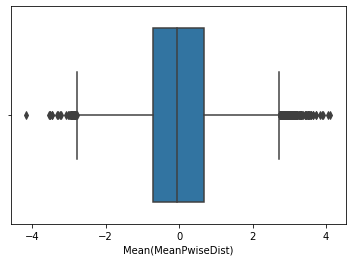

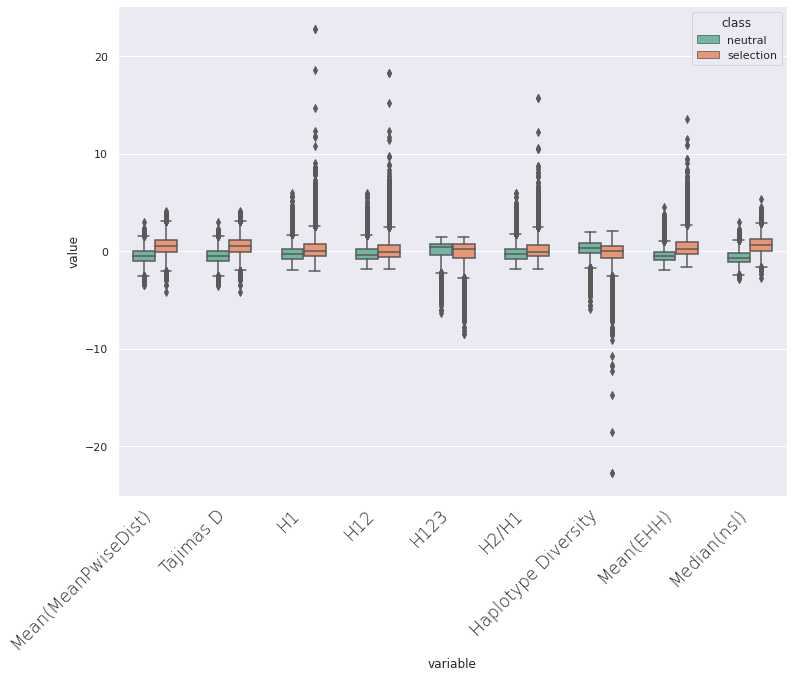

In [11]:
all_labels = pd.DataFrame(data=dataset, columns=['Mean(MeanPwiseDist)','Tajimas D', 
            'H1','H12','H123', 'H2/H1', 'Haplotype Diversity', 'Mean(EHH)', 'Median(nsl)'])

data_long = pd.melt(dataset, id_vars="class")
sns.boxplot(x="variable", y="value",hue='class', data=data_long, width=0.6, palette="Set2")

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()



